In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install missingno

# **About the Dataset**
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

In [2]:
df = pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# **Attributes**

**People**

ID: Customer's unique identifier<br>
Year_Birth: Customer's birth year<br>
Education: Customer's education level<br>
Marital_Status: Customer's marital status<br>
Income: Customer's yearly household income<br>
Kidhome: Number of children in customer's household<br>
Teenhome: Number of teenagers in customer's household<br>
Dt_Customer: Date of customer's enrollment with the company<br>
Recency: Number of days since customer's last purchase<br>
Complain: 1 if the customer complained in the last 2 years, 0 otherwise<br><br>
**Products**

MntWines: Amount spent on wine in last 2 years<br>
MntFruits: Amount spent on fruits in last 2 years<br>
MntMeatProducts: Amount spent on meat in last 2 years<br>
MntFishProducts: Amount spent on fish in last 2 years<br>
MntSweetProducts: Amount spent on sweets in last 2 years<br>
MntGoldProds: Amount spent on gold in last 2 years<br><br>
**Promotion**

NumDealsPurchases: Number of purchases made with a discount<br>
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise<br><br>
**Place**

NumWebPurchases: Number of purchases made through the company’s website<br>
NumCatalogPurchases: Number of purchases made using a catalogue<br>
NumStorePurchases: Number of purchases made directly in stores<br>
NumWebVisitsMonth: Number of visits to company’s website in the last month

# **Exploratory Data Analysis**

In [3]:
# shape of dataset
df.shape

(2240, 29)

In [4]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# basic statistics about the data
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Detecting the missing values**

In [6]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<Axes: >

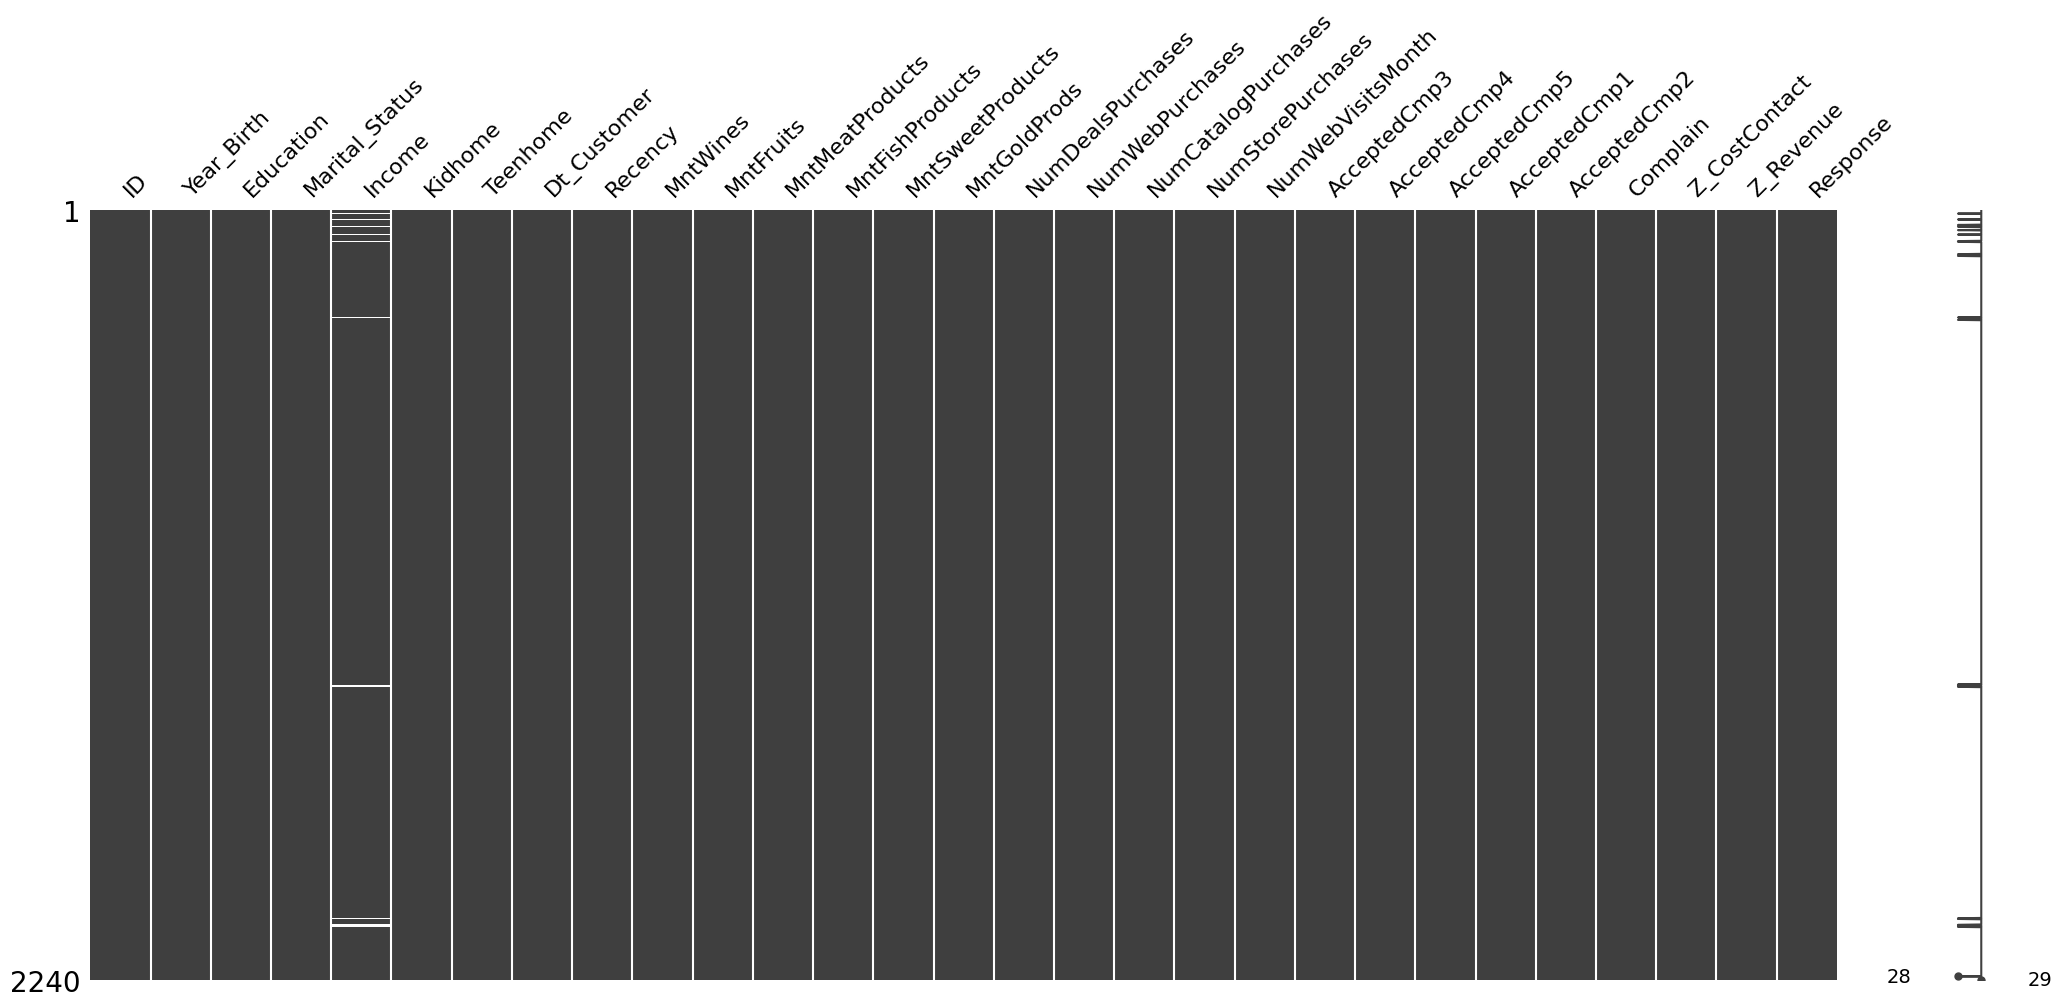

In [7]:
# visualiza missing data
import missingno as mn

mn.matrix(df)

In [8]:
# fill the missing values with median
df['Income'].fillna(df['Income'].median(), inplace=True)

/tmp/ipykernel_18/3004802559.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


**Detecting duplicate rows**

In [9]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [10]:
# finding number of unique features present in each column
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [11]:
# dropping the unwanted columns
df.drop(columns=['Z_CostContact','Z_Revenue'], inplace=True)

In [12]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


# **Univariate Analysis**

**1.Analysis on Year_Birth Variable.**

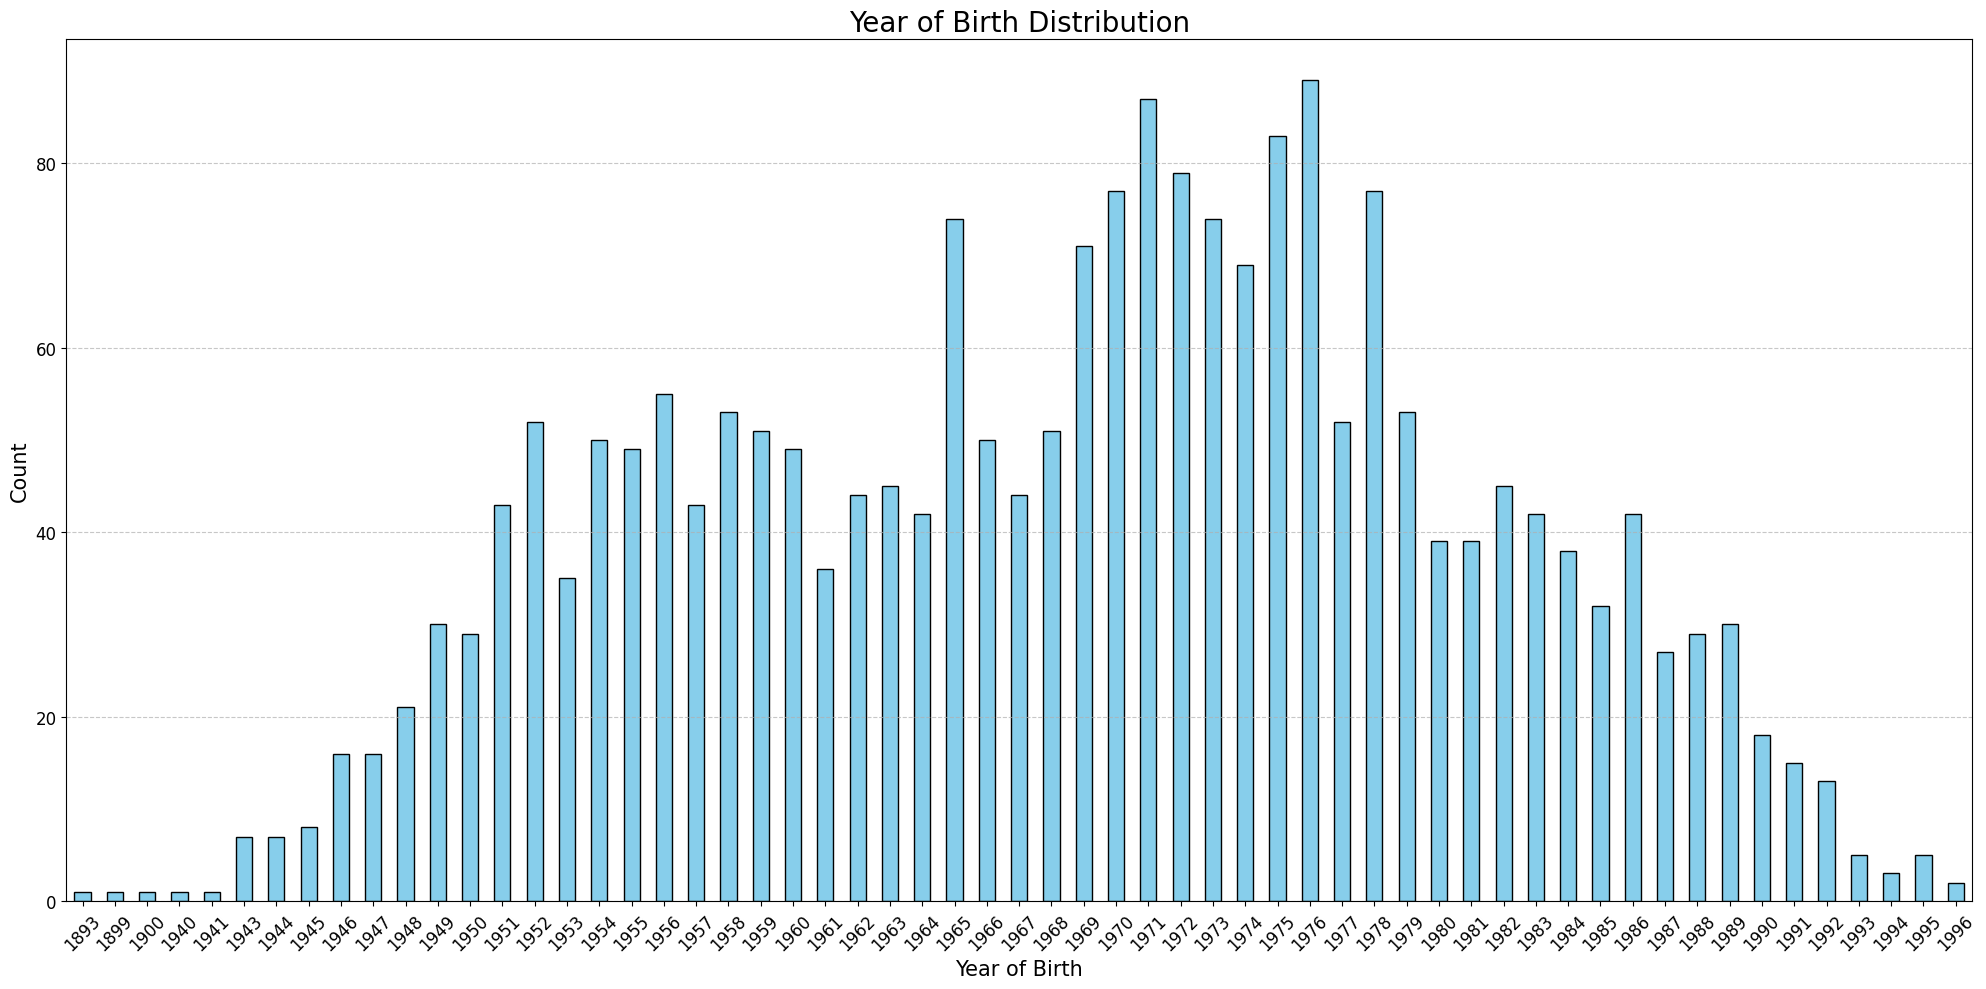

In [13]:
# Sort the year values
year_birth_counts = df['Year_Birth'].value_counts().sort_index()

# Plot
plt.figure(figsize=(20, 10))
year_birth_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Year of Birth Distribution', fontsize=20)
plt.xlabel('Year of Birth', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


**2.Analysis On Education Variable.**

In [14]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

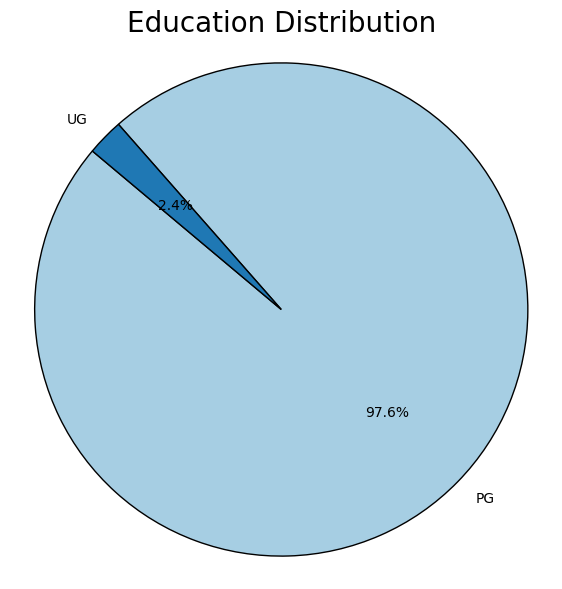

In [15]:
# Changing category into UG and PG only

df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')  
df['Education'] = df['Education'].replace(['Basic'], 'UG')

# Plotting the pie chart
plt.figure(figsize=(7, 7))
df['Education'].value_counts().plot(kind='pie', 
                                    autopct='%1.1f%%', 
                                    startangle=140, 
                                    colors=plt.cm.Paired.colors, 
                                    wedgeprops={'edgecolor': 'black'})

# Customizing the plot
plt.title('Education Distribution', fontsize=20)
plt.ylabel('')  # Removes the default ylabel
plt.axis('equal')  # Ensures that pie is drawn as a circle

# Show the plot
plt.show()

**3.Analysis On Marital_Status Variable.**

In [16]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

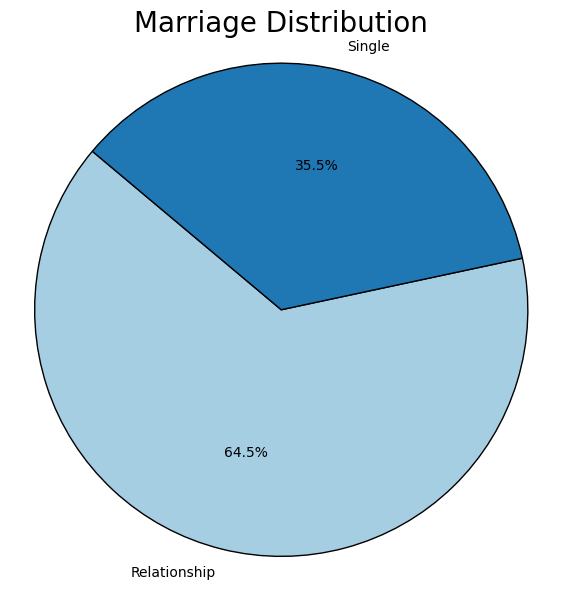

In [17]:
# replace the similar values
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

# Plotting the pie chart
plt.figure(figsize=(7, 7))
df['Marital_Status'].value_counts().plot(kind='pie', 
                                    autopct='%1.1f%%', 
                                    startangle=140, 
                                    colors=plt.cm.Paired.colors, 
                                    wedgeprops={'edgecolor': 'black'})

# Customizing the plot
plt.title('Marriage Distribution', fontsize=20)
plt.ylabel('')  # Removes the default ylabel
plt.axis('equal')  # Ensures that pie is drawn as a circle

# Show the plot
plt.show()

**4.Analysis On Income Variable.**

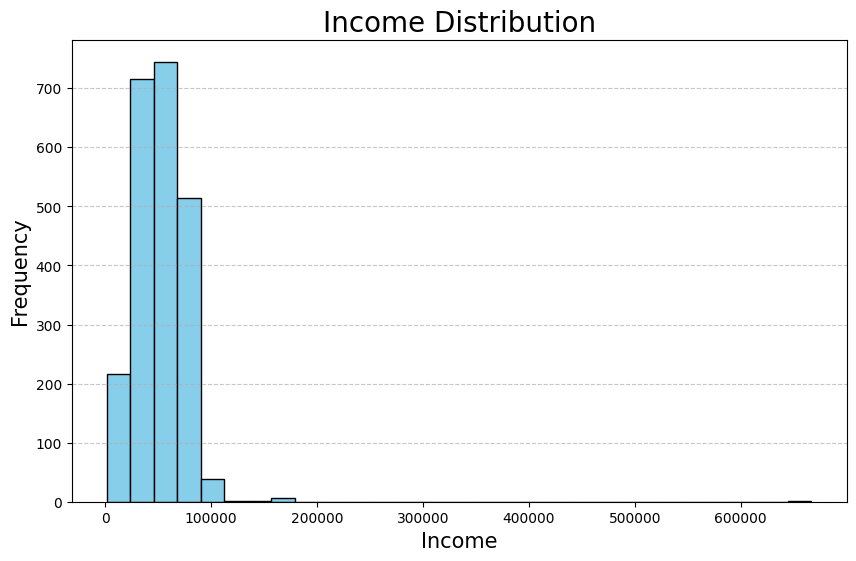

In [18]:
plt.figure(figsize=(10, 6))
df['Income'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Income Distribution', fontsize=20)
plt.xlabel('Income', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

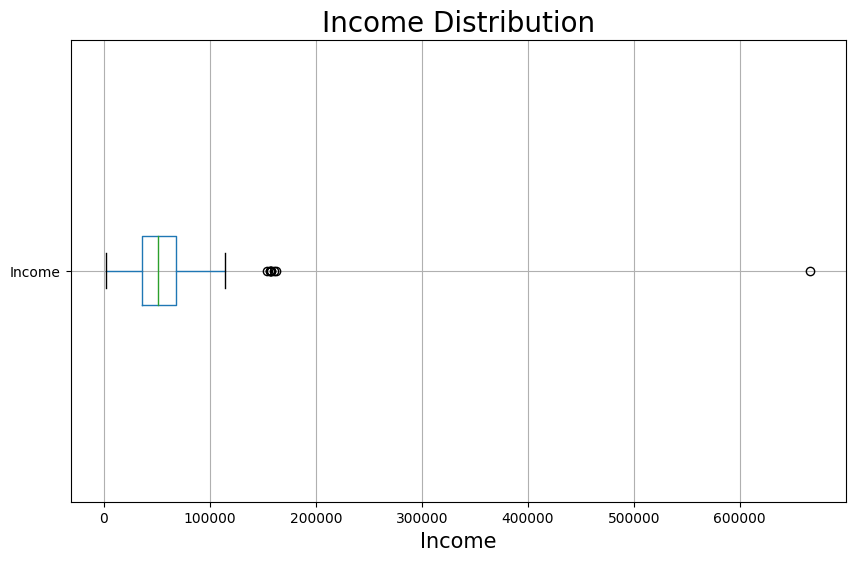

In [19]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Income', vert=False)
plt.title('Income Distribution', fontsize=20)
plt.xlabel('Income', fontsize=15)
plt.show()

**5.Analysis On "Kidhome,Teenhome" Variable.**

In [20]:
print(df['Kidhome'].value_counts())
print(df['Teenhome'].value_counts())

Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64
Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64


In [21]:
df['Kids'] = df['Kidhome'] + df['Teenhome']

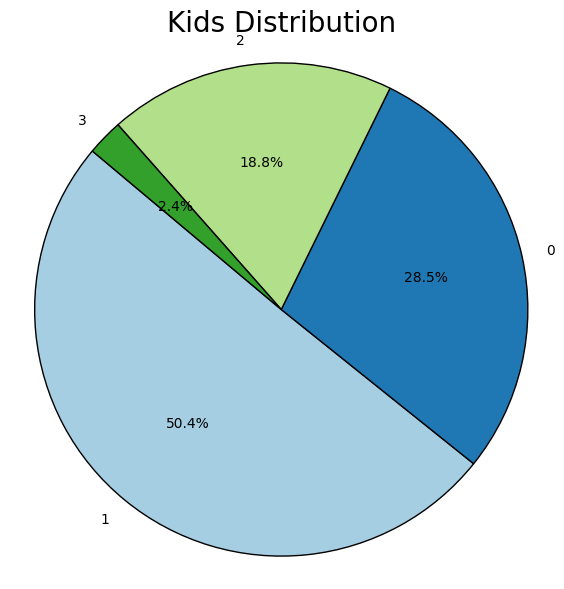

In [22]:
# Plotting the pie chart
plt.figure(figsize=(7, 7))
df['Kids'].value_counts().plot(kind='pie', 
                                    autopct='%1.1f%%', 
                                    startangle=140, 
                                    colors=plt.cm.Paired.colors, 
                                    wedgeprops={'edgecolor': 'black'})

# Customizing the plot
plt.title('Kids Distribution', fontsize=20)
plt.ylabel('')  # Removes the default ylabel
plt.axis('equal')  # Ensures that pie is drawn as a circle

# Show the plot
plt.show()

**6.Analysis On "MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds" Variable.**

In [23]:
df['MntWines'].value_counts()

MntWines
2       42
5       40
1       37
6       37
4       33
        ..
806      1
61       1
986      1
1230     1
428      1
Name: count, Length: 776, dtype: int64

In [24]:
df['MntFruits'].value_counts()

MntFruits
0      400
1      162
2      120
3      116
4      104
      ... 
164      1
130      1
189      1
101      1
154      1
Name: count, Length: 158, dtype: int64

In [25]:
df['MntMeatProducts'].value_counts()

MntMeatProducts
7      53
5      50
11     49
8      46
6      43
       ..
116     1
569     1
685     1
354     1
182     1
Name: count, Length: 558, dtype: int64

In [26]:
df['MntFishProducts'].value_counts()

MntFishProducts
0      384
2      156
3      130
4      108
6       82
      ... 
232      1
167      1
247      1
194      1
229      1
Name: count, Length: 182, dtype: int64

In [27]:
df['MntSweetProducts'].value_counts()

MntSweetProducts
0      419
1      161
2      128
3      101
4       82
      ... 
146      1
132      1
167      1
99       1
111      1
Name: count, Length: 177, dtype: int64

In [28]:
df['MntGoldProds'].value_counts()

MntGoldProds
1      73
4      70
3      69
5      63
12     63
       ..
178     1
169     1
132     1
262     1
247     1
Name: count, Length: 213, dtype: int64

In [29]:
# Combining different dataframe into a single column to reduce the number of dimension

df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Expenses'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Expenses, dtype: float64

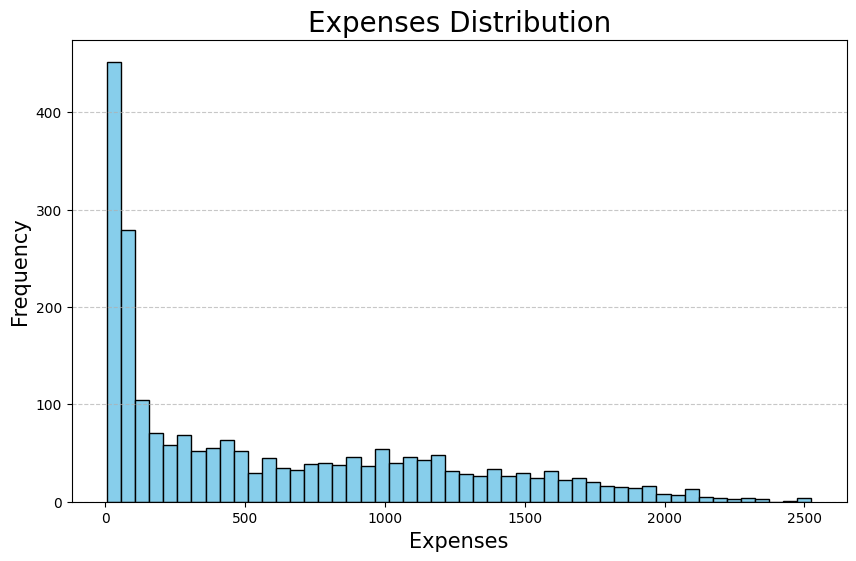

In [30]:
plt.figure(figsize=(10, 6))
df['Expenses'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Expenses Distribution', fontsize=20)
plt.xlabel('Expenses', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

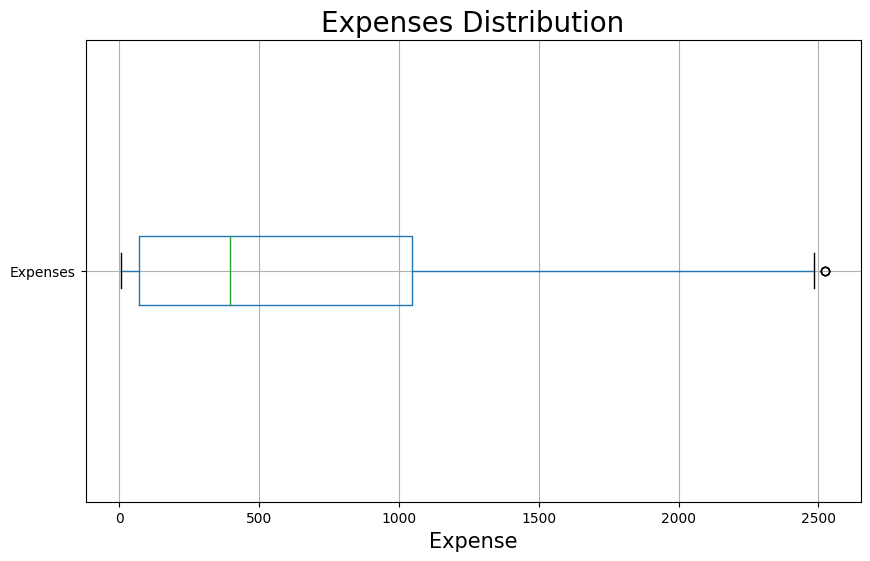

In [31]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Expenses', vert=False)
plt.title('Expenses Distribution', fontsize=20)
plt.xlabel('Expense', fontsize=15)
plt.show()

**7.Analysis on "AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5" Variable.**

In [32]:
df['AcceptedCmp1'].value_counts()

AcceptedCmp1
0    2096
1     144
Name: count, dtype: int64

In [33]:
df['AcceptedCmp2'].value_counts()

AcceptedCmp2
0    2210
1      30
Name: count, dtype: int64

In [34]:
df['AcceptedCmp3'].value_counts()

AcceptedCmp3
0    2077
1     163
Name: count, dtype: int64

In [35]:
df['AcceptedCmp4'].value_counts()

AcceptedCmp4
0    2073
1     167
Name: count, dtype: int64

In [36]:
df['AcceptedCmp5'].value_counts()

AcceptedCmp5
0    2077
1     163
Name: count, dtype: int64

In [37]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

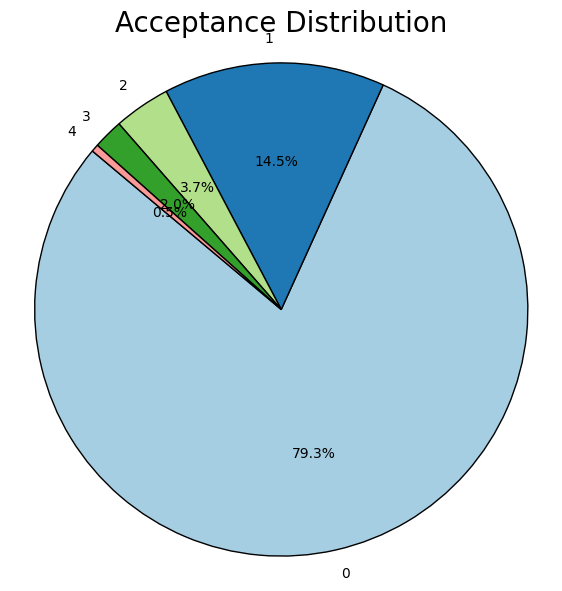

In [38]:
# Plotting the pie chart
plt.figure(figsize=(7, 7))
df['TotalAcceptedCmp'].value_counts().plot(kind='pie', 
                                    autopct='%1.1f%%', 
                                    startangle=140, 
                                    colors=plt.cm.Paired.colors, 
                                    wedgeprops={'edgecolor': 'black'})

# Customizing the plot
plt.title('Acceptance Distribution', fontsize=20)
plt.ylabel('')  # Removes the default ylabel
plt.axis('equal')  # Ensures that pie is drawn as a circle

# Show the plot
plt.show()

**8.Analysis on "NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases" Variable.**

In [39]:
df['NumWebPurchases'].value_counts()

NumWebPurchases
2     373
1     354
3     336
4     280
5     220
6     205
7     155
8     102
9      75
0      49
11     44
10     43
27      2
23      1
25      1
Name: count, dtype: int64

In [40]:
df['NumStorePurchases'].value_counts()

NumStorePurchases
3     490
4     323
2     223
5     212
6     178
8     149
7     143
10    125
9     106
12    105
13     83
11     81
0      15
1       7
Name: count, dtype: int64

In [41]:
df['NumCatalogPurchases'].value_counts()

NumCatalogPurchases
0     586
1     497
2     276
3     184
4     182
5     140
6     128
7      79
8      55
10     48
9      42
11     19
28      3
22      1
Name: count, dtype: int64

In [42]:
df['NumDealsPurchases'].value_counts()

NumDealsPurchases
1     970
2     497
3     297
4     189
5      94
6      61
0      46
7      40
8      14
9       8
15      7
10      5
11      5
12      4
13      3
Name: count, dtype: int64

In [43]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['NumTotalPurchases'].value_counts()

NumTotalPurchases
7     149
5     145
4     128
6     123
17    116
9     102
19    101
16    101
21     95
8      94
22     94
20     94
23     87
10     80
18     79
15     74
12     70
25     68
26     67
11     67
24     56
14     55
13     44
27     39
28     35
29     19
32     12
30     11
31     11
1       4
0       4
33      4
34      4
2       3
37      1
39      1
35      1
43      1
44      1
Name: count, dtype: int64

In [44]:
df['NumTotalPurchases'].describe()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: NumTotalPurchases, dtype: float64

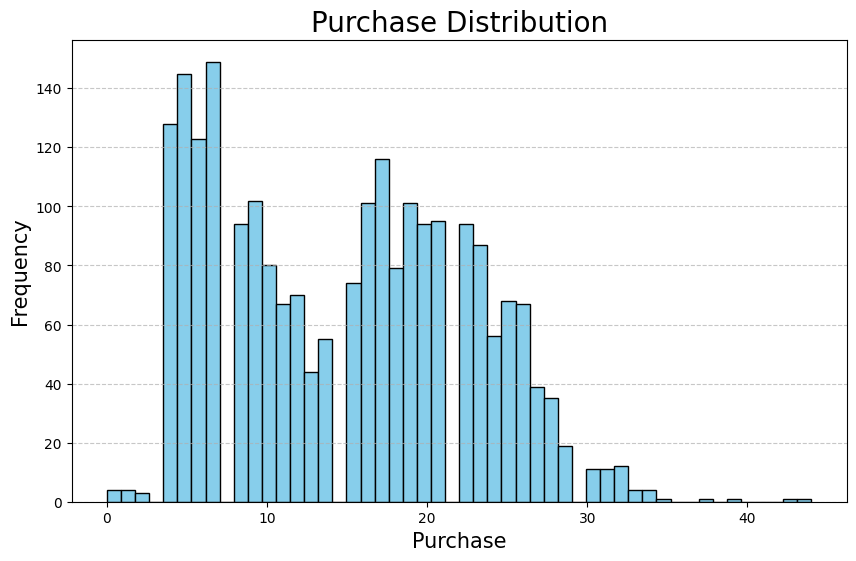

In [45]:
plt.figure(figsize=(10, 6))
df['NumTotalPurchases'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Purchase Distribution', fontsize=20)
plt.xlabel('Purchase', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

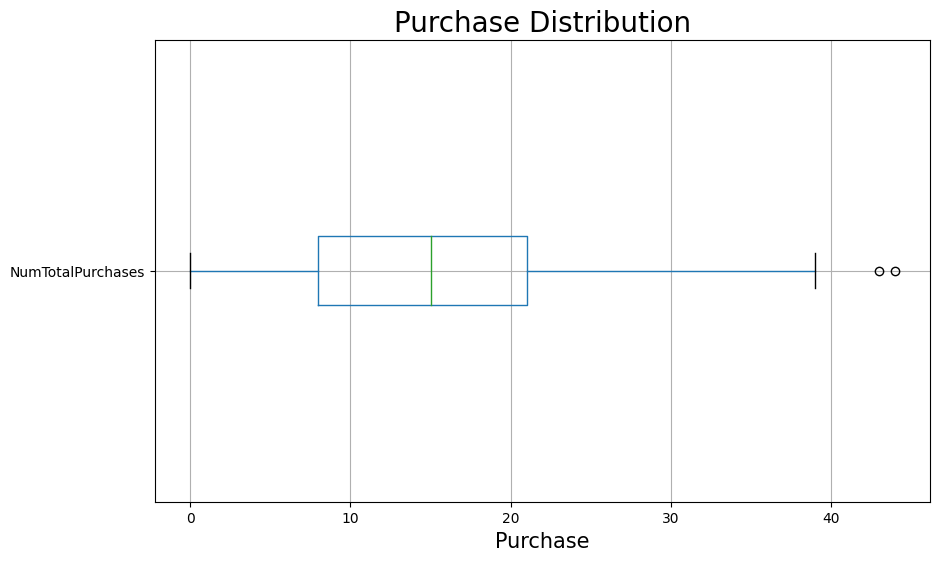

In [46]:
plt.figure(figsize=(10, 6))
df.boxplot(column='NumTotalPurchases', vert=False)
plt.title('Purchase Distribution', fontsize=20)
plt.xlabel('Purchase', fontsize=15)
plt.show()

**Remove the redundant columns to reduce dimensionality**

In [47]:
col_del = ["ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df = df.drop(columns=col_del,axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,1957,PG,Single,58138.0,04-09-2012,58,0,1,0,1617,0,25
1,1954,PG,Single,46344.0,08-03-2014,38,0,0,2,27,0,6
2,1965,PG,Relationship,71613.0,21-08-2013,26,0,0,0,776,0,21
3,1984,PG,Relationship,26646.0,10-02-2014,26,0,0,1,53,0,8
4,1981,PG,Relationship,58293.0,19-01-2014,94,0,0,1,422,0,19


In [48]:
df.shape

(2240, 12)

In [49]:
# Convert Dt_Customer to datetime with the specified format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [50]:
# number of days of customer engaged with company
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['First_day'] = '01-01-2015'
df['First_day'] = pd.to_datetime(df.First_day)
df['Day_engaged'] = (df['First_day'] - df['Dt_Customer']).dt.days

Unique categories present in the Age: Engaged_time
11    1189
10     557
12     494
Name: count, dtype: int64




<Figure size 800x800 with 0 Axes>

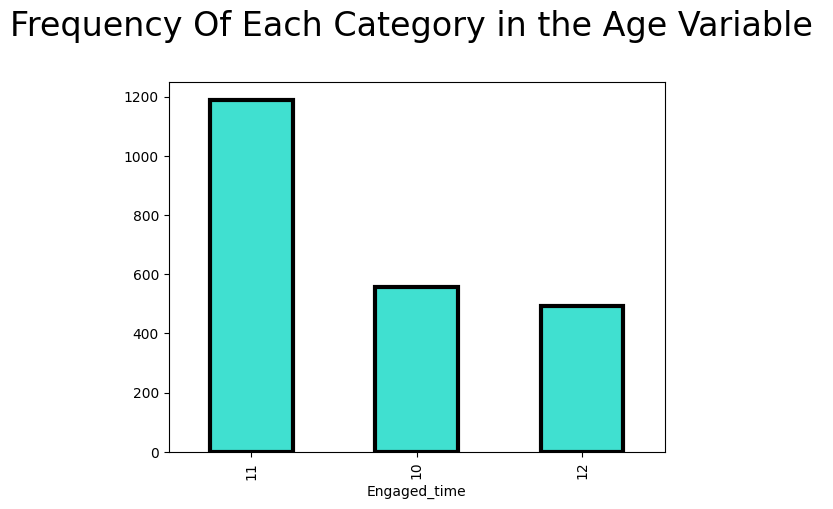

<Figure size 800x800 with 0 Axes>

In [51]:
# engaged time of customer
df['Engaged_time'] = (pd.Timestamp('now').year) - (pd.to_datetime(df['Dt_Customer']).dt.year)

#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Age"
print("Unique categories present in the Age:",df['Engaged_time'].value_counts())
print("\n")


#VISUALIZING THE "Age"
df['Engaged_time'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Age Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

In [52]:
# visualize dataset now
df.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,First_day,Day_engaged,Engaged_time
0,1957,PG,Single,58138.0,2012-09-04,58,0,1,0,1617,0,25,2015-01-01,849,12
1,1954,PG,Single,46344.0,2014-03-08,38,0,0,2,27,0,6,2015-01-01,299,10
2,1965,PG,Relationship,71613.0,2013-08-21,26,0,0,0,776,0,21,2015-01-01,498,11
3,1984,PG,Relationship,26646.0,2014-02-10,26,0,0,1,53,0,8,2015-01-01,325,10
4,1981,PG,Relationship,58293.0,2014-01-19,94,0,0,1,422,0,19,2015-01-01,347,10


In [53]:
df=df.drop(columns=["Dt_Customer", "First_day", "Year_Birth", "Dt_Customer", "Recency", "Complain","Response"],axis=1)
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Day_engaged,Engaged_time
0,PG,Single,58138.0,0,1617,0,25,849,12
1,PG,Single,46344.0,2,27,0,6,299,10
2,PG,Relationship,71613.0,0,776,0,21,498,11
3,PG,Relationship,26646.0,1,53,0,8,325,10
4,PG,Relationship,58293.0,1,422,0,19,347,10


In [54]:
#REARRANGE THE ORDER OF COLUMNS:-
order = [0,1,3,4,6,7,8,2,5]
df = df[[df.columns[i] for i in order]]
df.head(5)

,Education,Marital_Status,Kids,Expenses,NumTotalPurchases,Day_engaged,Engaged_time,Income,TotalAcceptedCmp
0,PG,Single,0,1617,25,849,12,58138.0,0
1,PG,Single,2,27,6,299,10,46344.0,0
2,PG,Relationship,0,776,21,498,11,71613.0,0
3,PG,Relationship,1,53,8,325,10,26646.0,0
4,PG,Relationship,1,422,19,347,10,58293.0,0


In [55]:
df.shape

(2240, 9)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Kids               2240 non-null   int64  
 3   Expenses           2240 non-null   int64  
 4   NumTotalPurchases  2240 non-null   int64  
 5   Day_engaged        2240 non-null   int64  
 6   Engaged_time       2240 non-null   int32  
 7   Income             2240 non-null   float64
 8   TotalAcceptedCmp   2240 non-null   int64  
dtypes: float64(1), int32(1), int64(5), object(2)
memory usage: 148.9+ KB


# **Bivariate Analysis**

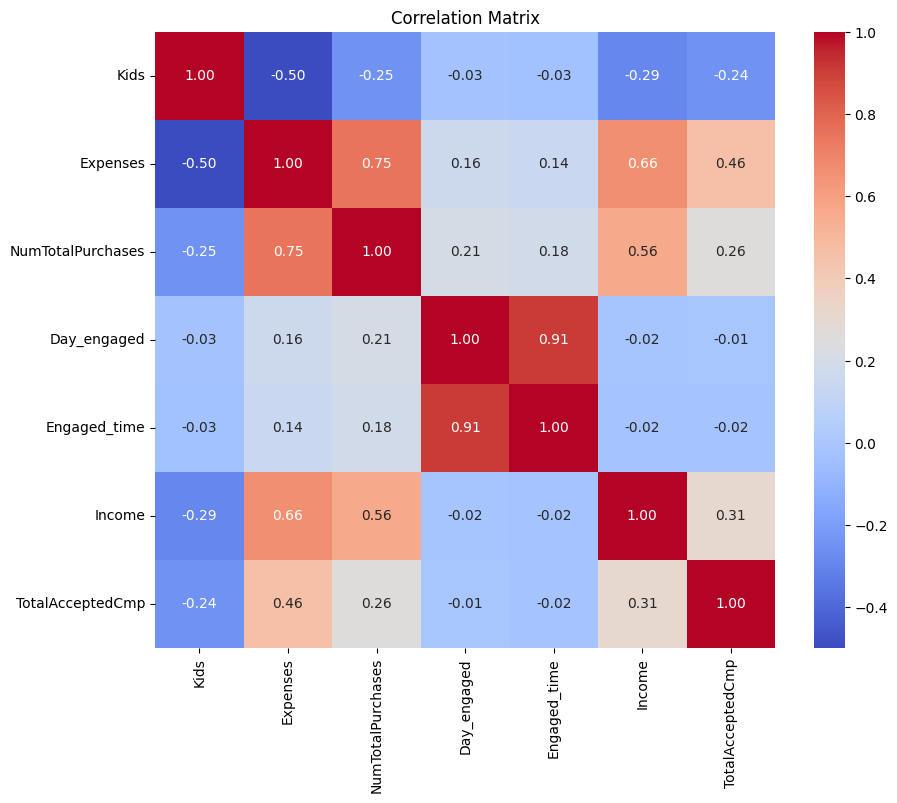

In [57]:
# Select numeric columns
numeric_cols = ['Kids', 'Expenses', 'NumTotalPurchases', 'Day_engaged', 'Engaged_time', 'Income', 'TotalAcceptedCmp']

# Correlation Matrix
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

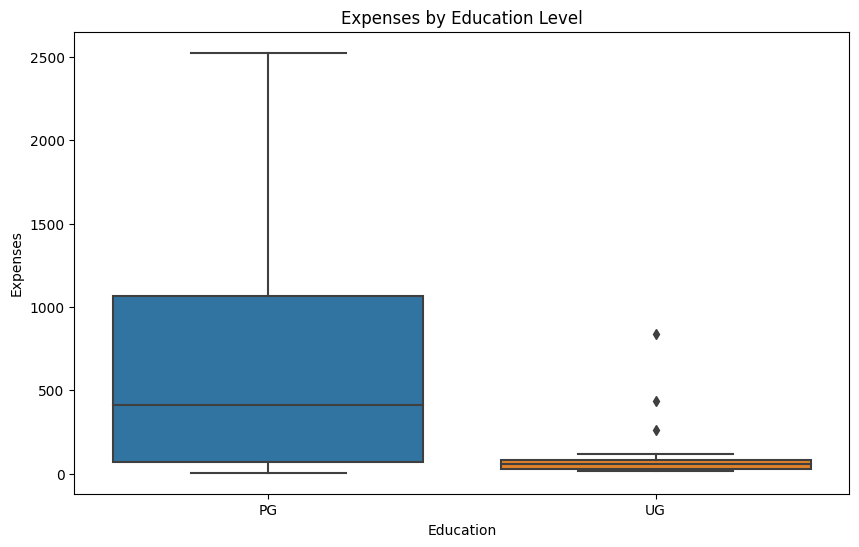

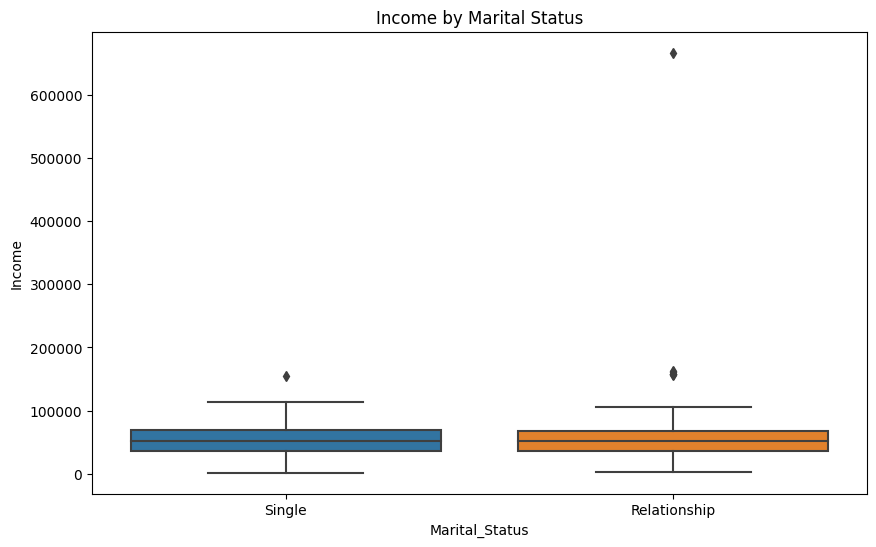

In [58]:
# Box Plot: Expenses vs Education
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Expenses', data=df)
plt.title('Expenses by Education Level')
plt.show()

# Box Plot: Income vs Marital_Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital_Status', y='Income', data=df)
plt.title('Income by Marital Status')
plt.show()


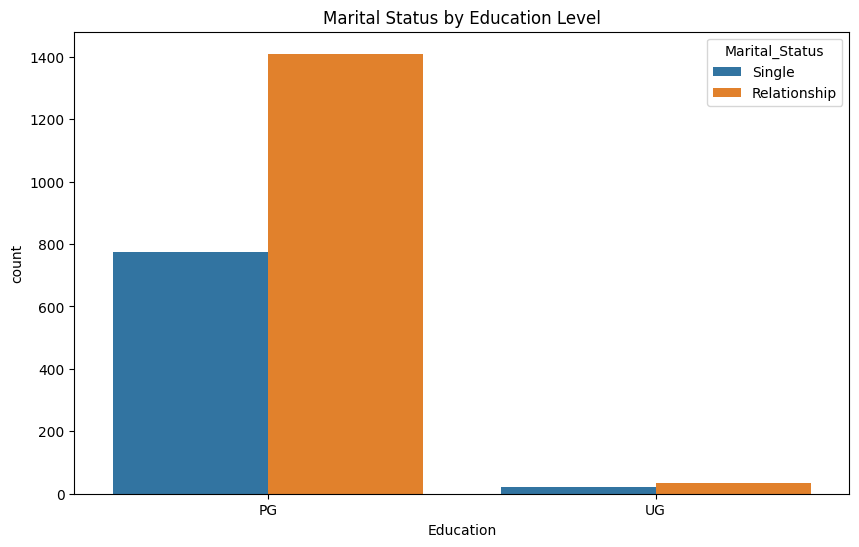

In [59]:
# Bar Plot: Education vs Marital_Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Marital_Status', data=df)
plt.title('Marital Status by Education Level')
plt.show()


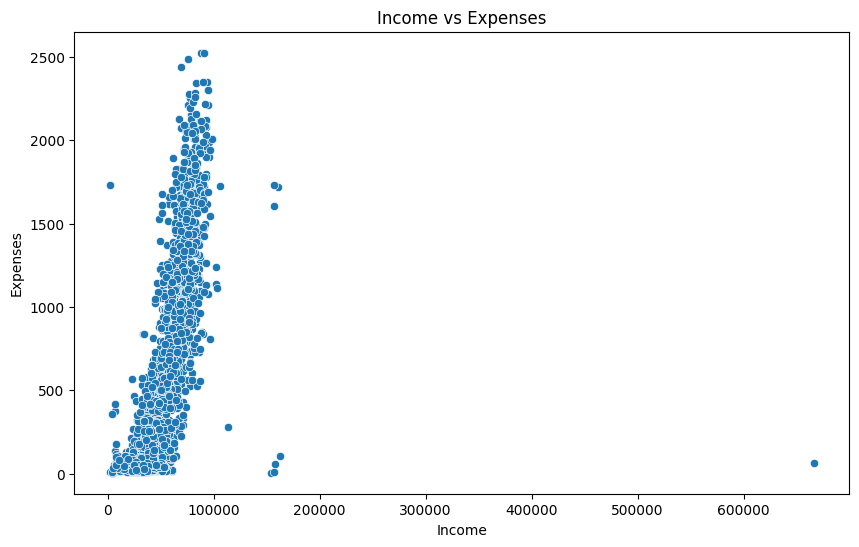

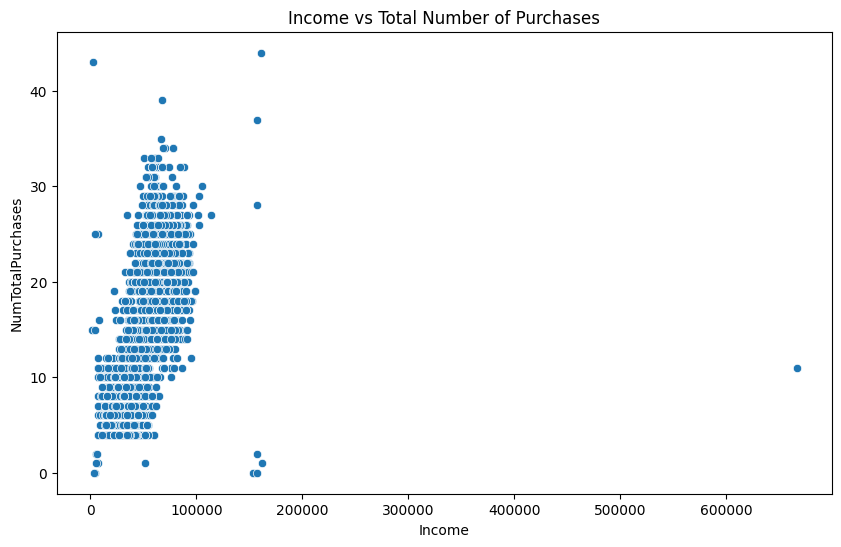

In [60]:
# Scatter Plot: Income vs Expenses
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Expenses', data=df)
plt.title('Income vs Expenses')
plt.show()

# Scatter Plot: Income vs NumTotalPurchases
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='NumTotalPurchases', data=df)
plt.title('Income vs Total Number of Purchases')
plt.show()


# **Data Preprocessing**

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Kids               2240 non-null   int64  
 3   Expenses           2240 non-null   int64  
 4   NumTotalPurchases  2240 non-null   int64  
 5   Day_engaged        2240 non-null   int64  
 6   Engaged_time       2240 non-null   int32  
 7   Income             2240 non-null   float64
 8   TotalAcceptedCmp   2240 non-null   int64  
dtypes: float64(1), int32(1), int64(5), object(2)
memory usage: 148.9+ KB


In [62]:
numerical_features = []
categorical_features = []

for col in df.columns:
    if df[col].dtype in ['int64', 'float64', 'int32']:
        numerical_features.append(col)
    elif df[col].dtype == 'object':
        categorical_features.append(col)
        
print('numerical features are: ',numerical_features)
print('categorical features are: ',categorical_features)

numerical features are:  ['Kids', 'Expenses', 'NumTotalPurchases', 'Day_engaged', 'Engaged_time', 'Income', 'TotalAcceptedCmp']
categorical features are:  ['Education', 'Marital_Status']


In [63]:
df_encoded = pd.get_dummies(df, columns=categorical_features)
df_encoded.head()

,Kids,Expenses,NumTotalPurchases,Day_engaged,Engaged_time,Income,TotalAcceptedCmp,Education_PG,Education_UG,Marital_Status_Relationship,Marital_Status_Single
0,0,1617,25,849,12,58138.0,0,True,False,False,True
1,2,27,6,299,10,46344.0,0,True,False,False,True
2,0,776,21,498,11,71613.0,0,True,False,True,False
3,1,53,8,325,10,26646.0,0,True,False,True,False
4,1,422,19,347,10,58293.0,0,True,False,True,False


In [64]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Kids                         2240 non-null   int64  
 1   Expenses                     2240 non-null   int64  
 2   NumTotalPurchases            2240 non-null   int64  
 3   Day_engaged                  2240 non-null   int64  
 4   Engaged_time                 2240 non-null   int32  
 5   Income                       2240 non-null   float64
 6   TotalAcceptedCmp             2240 non-null   int64  
 7   Education_PG                 2240 non-null   bool   
 8   Education_UG                 2240 non-null   bool   
 9   Marital_Status_Relationship  2240 non-null   bool   
 10  Marital_Status_Single        2240 non-null   bool   
dtypes: bool(4), float64(1), int32(1), int64(5)
memory usage: 122.6 KB


In [65]:
cat = []
for col in df_encoded.columns:
    if df_encoded[col].dtype == "bool":
        cat.append(col)
        
print(cat)

['Education_PG', 'Education_UG', 'Marital_Status_Relationship', 'Marital_Status_Single']


In [66]:
df_encoded[cat] = df_encoded[cat].astype(int)
df_encoded.head()

,Kids,Expenses,NumTotalPurchases,Day_engaged,Engaged_time,Income,TotalAcceptedCmp,Education_PG,Education_UG,Marital_Status_Relationship,Marital_Status_Single
0,0,1617,25,849,12,58138.0,0,1,0,0,1
1,2,27,6,299,10,46344.0,0,1,0,0,1
2,0,776,21,498,11,71613.0,0,1,0,1,0
3,1,53,8,325,10,26646.0,0,1,0,1,0
4,1,422,19,347,10,58293.0,0,1,0,1,0


In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df_encoded[:] = sc.fit_transform(df_encoded[:])
df_encoded.head()

/tmp/ipykernel_18/3080725396.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.2645053   1.39636071 -1.2645053  ... -1.2645053   0.06592771
  1.39636071]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_encoded[:] = sc.fit_transform(df_encoded[:])
/tmp/ipykernel_18/3080725396.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.67941681 -0.96127545  0.28267329 ...  1.05495122  0.39394775
 -0.7204576 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_encoded[:] = sc.fit_transform(df_encoded[:])
/tmp/ipykernel_18/3080725396.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.32082612 -1.15459595  0.79968463 ...  0.53911389  1.06025538
 -0.50316909]' has dtype incompatible with

,Kids,Expenses,NumTotalPurchases,Day_engaged,Engaged_time,Income,TotalAcceptedCmp,Education_PG,Education_UG,Marital_Status_Relationship,Marital_Status_Single
0,-1.264505,1.679417,1.320826,1.531185,1.502225,0.235696,-0.439037,0.157171,-0.157171,-1.346874,1.346874
1,1.396361,-0.961275,-1.154596,-1.190545,-1.420036,-0.235454,-0.439037,0.157171,-0.157171,-1.346874,1.346874
2,-1.264505,0.282673,0.799685,-0.205773,0.041094,0.773999,-0.439037,0.157171,-0.157171,0.742460,-0.742460
3,0.065928,-0.918094,-0.894025,-1.061881,-1.420036,-1.022355,-0.439037,0.157171,-0.157171,0.742460,-0.742460
4,0.065928,-0.305254,0.539114,-0.953012,-1.420036,0.241888,-0.439037,0.157171,-0.157171,0.742460,-0.742460


# **Elbow method for Finding number of Clusters**

In [68]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Kids                         2240 non-null   float64
 1   Expenses                     2240 non-null   float64
 2   NumTotalPurchases            2240 non-null   float64
 3   Day_engaged                  2240 non-null   float64
 4   Engaged_time                 2240 non-null   float64
 5   Income                       2240 non-null   float64
 6   TotalAcceptedCmp             2240 non-null   float64
 7   Education_PG                 2240 non-null   float64
 8   Education_UG                 2240 non-null   float64
 9   Marital_Status_Relationship  2240 non-null   float64
 10  Marital_Status_Single        2240 non-null   float64
dtypes: float64(11)
memory usage: 192.6 KB


In [69]:
X = df_encoded.iloc[:, [3,7]].values
print(X)

[[ 1.53118494  0.15717078]
 [-1.19054458  0.15717078]
 [-0.20577336  0.15717078]
 ...
 [-0.98270342  0.15717078]
 [-0.97775482  0.15717078]
 [ 1.32829237  0.15717078]]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

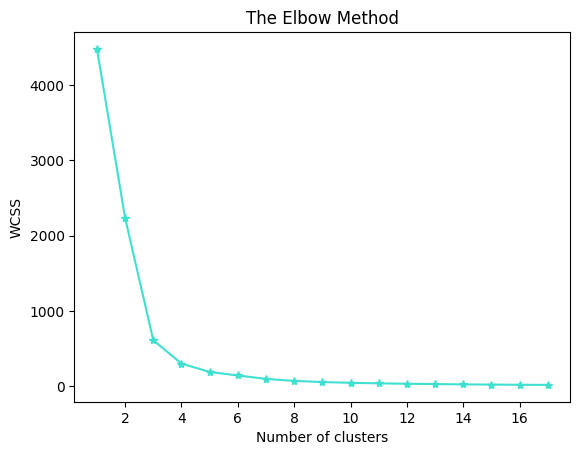

In [70]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 18), wcss,color = "turquoise",marker = '*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# **K-Means Clustering**

In [71]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=50)
y_kmeans = kmeans.fit_predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


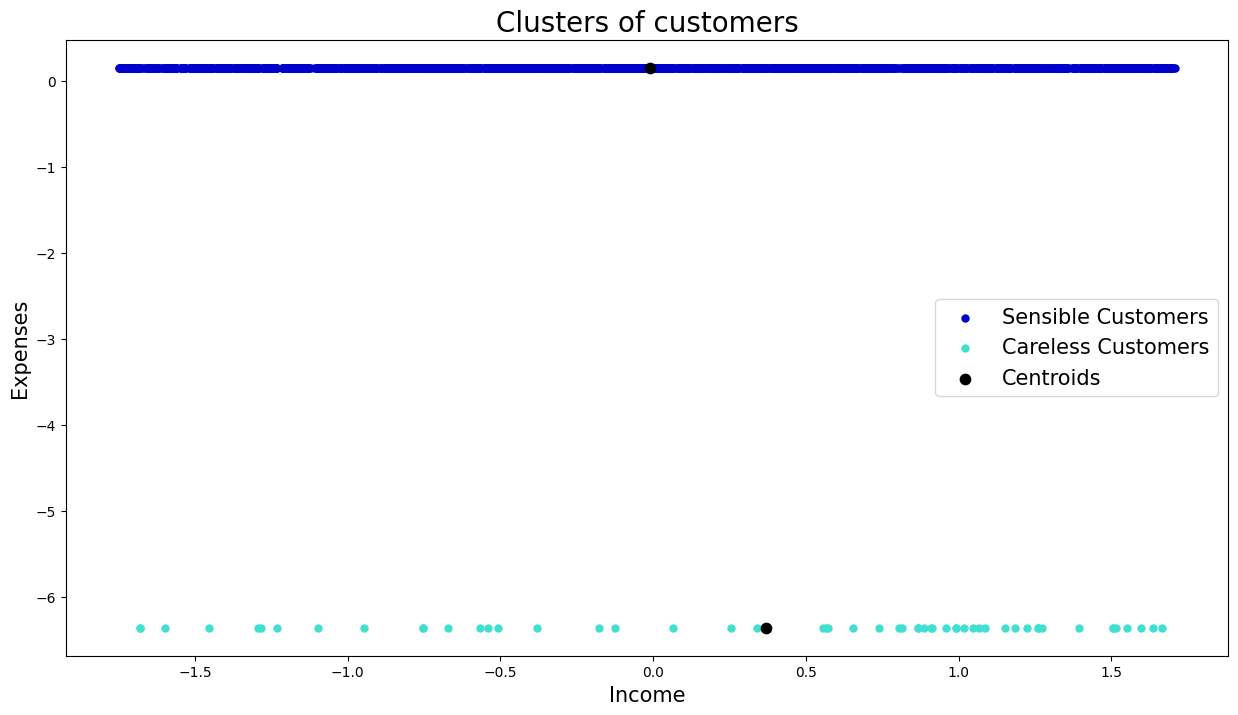

In [72]:
# Visualising the clusters
plt.figure(figsize= (15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 25, c = 'mediumblue', label = 'Sensible Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 25, c = 'turquoise', label = 'Careless Customers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 55, c = 'black', label = 'Centroids')
plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Expenses',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()